# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data

Download the data from IBM Object Storage.

curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

---
https://monovm.com/blog/cmd-commands-download/

**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets.

## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [2]:
# df = data fram
df = pd.read_csv('FuelConsumption.csv')

# take a look at the dataset

df.head()

# df['ENGINESIZE'].head()
# df.head(10)
# df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Let's first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

# std : Standard deviation (σ)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.

In [4]:
# df['ENGINESIZE']

# cdf : custom data fram
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:

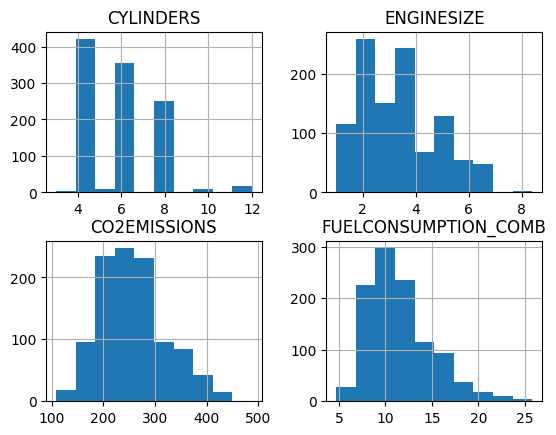

In [5]:
# ziz : visualize
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

# In Matplotlib, we use the hist() function to create histograms.
# A histogram is a graph showing frequency distributions.
# It is a graph showing the number of observations within each given interval.
# https://www.w3schools.com/python/matplotlib_histograms.asp

viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

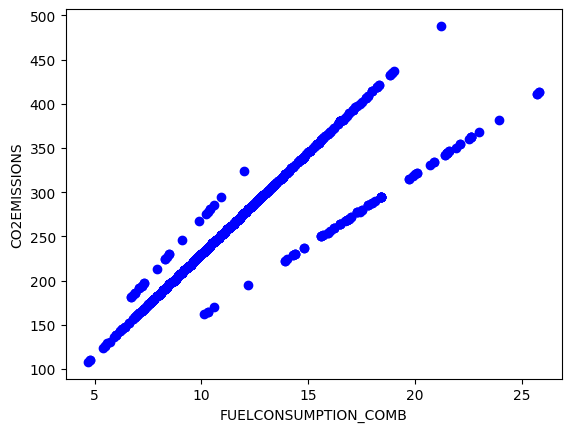

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

# Domain Expert
# For example, talk to an expert about bank fraud.

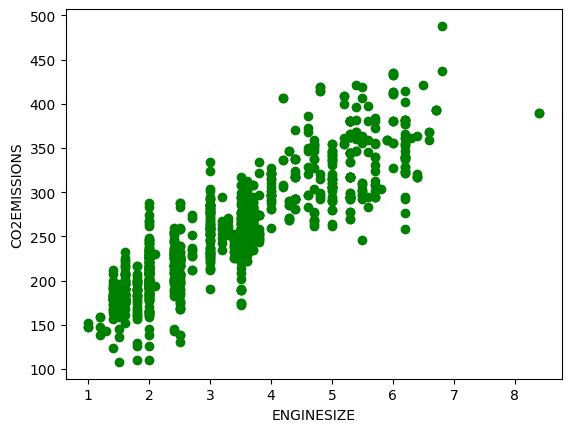

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

## Practice

Plot **CYLINDER** vs the Emission, to see how linear is their relationship is:

In [8]:
# write your code here




<details><summary>Click here for the solution</summary>
    
```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

```

</details>

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

* Masking is a method of indicating which elements of a matrix or vector should and should not be used.

In [9]:
msk = np.random.rand(len(df)) < 0.9
train = cdf[msk]
test = cdf[~msk]

print('cdf: ', cdf, '\n')

print('msk: ', msk, '| len(msk): ', len(msk), '\n')
print('train: ', train, '\n')

print('~msk: ', ~msk, '| len(~msk): ', len(~msk), '\n')
print('test: ', test, '\n')

cdf:        ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[1067 rows x 4 columns] 

msk:  [ True  True  True ...  True  True  True] | len(msk):  1067 

train:        ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5          

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

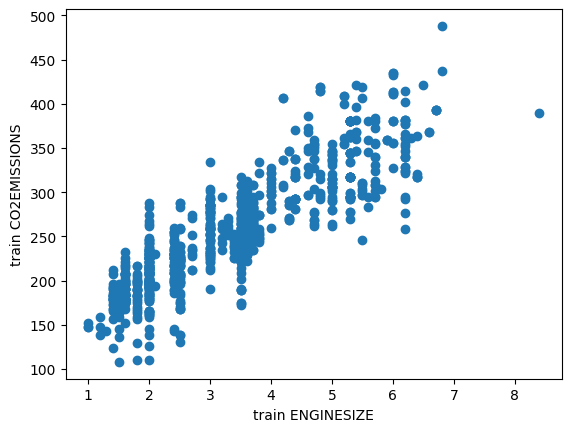

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel('train ENGINESIZE')
plt.ylabel('train CO2EMISSIONS')
plt.show()

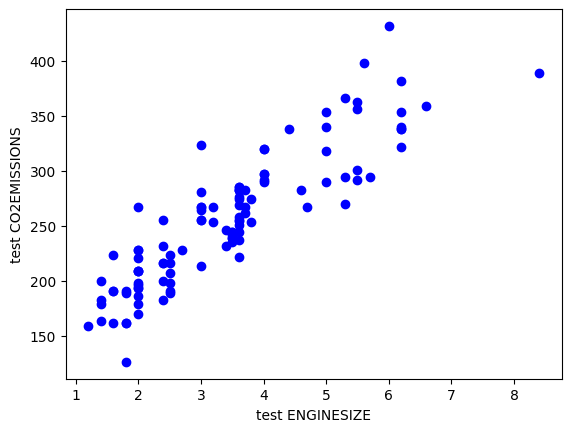

In [11]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='blue')
plt.xlabel('test ENGINESIZE')
plt.ylabel('test CO2EMISSIONS')
plt.show()

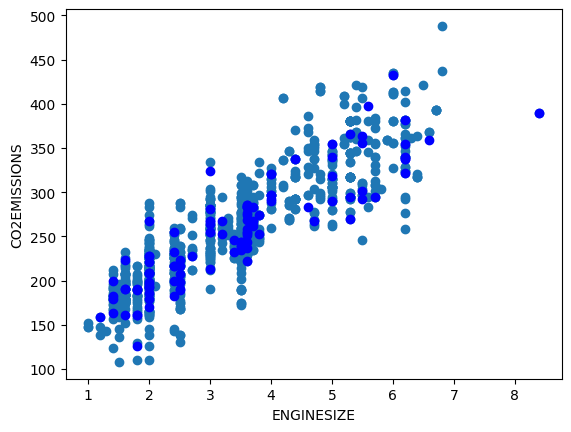

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

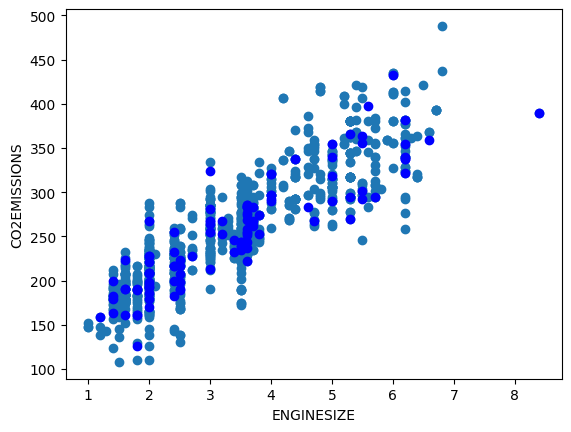

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='blue')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

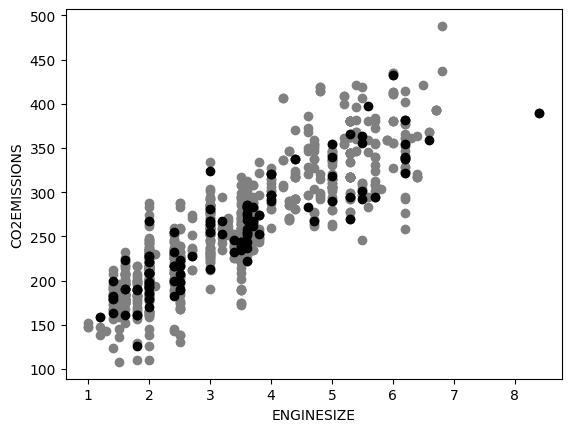

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='grey')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="black")

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

#### Modeling

Using sklearn package to model data.

In [15]:
# https://scikit-learn.org/stable/modules/linear_model.html
# https://numpy.org/doc/stable/reference/generated/numpy.asanyarray.html
from sklearn import linear_model
reg = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
# -------------------------------------------------------------------------------------------
print("train['ENGINESIZE']", type(train['ENGINESIZE']))
print(train['ENGINESIZE'].head() )
print("train[['ENGINESIZE']]", type(train[['ENGINESIZE']]))
print(train[['ENGINESIZE']].head() )
print("np.asanyarray(train[['ENGINESIZE']])", type(np.asanyarray(train[['ENGINESIZE']])))
print(train_x[:5])
print()

print("train['CO2EMISSIONS']", type(train['CO2EMISSIONS']))
print(train['CO2EMISSIONS'].head() )
print("train[['CO2EMISSIONS']]", type(train[['CO2EMISSIONS']]))
print(train[['CO2EMISSIONS']].head())
print("np.asanyarray(train[['CO2EMISSIONS']])", type(np.asanyarray(train[['CO2EMISSIONS']])))
print(train_y[:5])
print()
# -------------------------------------------------------------------------------------------

reg.fit(train_x, train_y)

# The coefficients
# Theta 0 and theta 1 are also called the coefficients of the linear equation.

# Theta 0 and theta 1 are the parameters of the line

# Theta 1 is known as the slope or gradient of the fitting line and theta 0 is known as the intercept.

print('Coefficients: ', reg.coef_) # The coefficients of an array are [ [], [], ...].
print('Intercept: ', reg.intercept_) # The intercept or theta 0 is just a number.

train['ENGINESIZE'] <class 'pandas.core.series.Series'>
0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64
train[['ENGINESIZE']] <class 'pandas.core.frame.DataFrame'>
   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
np.asanyarray(train[['ENGINESIZE']]) <class 'numpy.ndarray'>
[[2. ]
 [2.4]
 [1.5]
 [3.5]
 [3.5]]

train['CO2EMISSIONS'] <class 'pandas.core.series.Series'>
0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64
train[['CO2EMISSIONS']] <class 'pandas.core.frame.DataFrame'>
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244
np.asanyarray(train[['CO2EMISSIONS']]) <class 'numpy.ndarray'>
[[196]
 [221]
 [136]
 [255]
 [244]]

Coefficients:  [[39.43668642]]
Intercept:  [124.69300899]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

reg.coef_:  [[39.43668642]]
reg.coef_[0]:  [39.43668642]
reg.coef_[0][0]:  39.4366864212527

reg.intercept_:  [124.69300899]
reg.intercept_[0]:  124.69300899276607



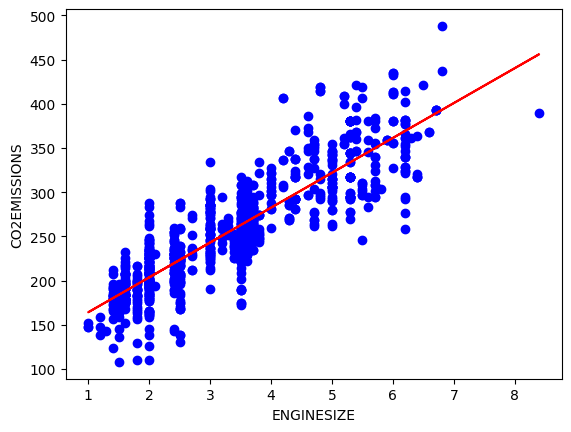

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
#            X                    Y = θ1x + θ0
#        -------  ---------------------------------------------
#     for each x      Theta 1     *    x    +      Theta 0
#        -------  ---------------------------------------------
plt.plot(train_x, reg.coef_[0][0] * train_x + reg.intercept_[0], '-r')

# ---------------------------------------------
print('reg.coef_: ', reg.coef_)
print('reg.coef_[0]: ', reg.coef_[0])
print('reg.coef_[0][0]: ', reg.coef_[0][0])
print()
print('reg.intercept_: ', reg.intercept_)
print('reg.intercept_[0]: ', reg.intercept_[0])
print()

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.plot(reg.intercept_[0], 'r.')

# plt.plot(train_x[0], reg.coef_[0][0]*train_x[0] + reg.intercept_[0], 'g^')
# plt.plot(reg.intercept_[0], 'y.')
# ---------------------------------------------

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

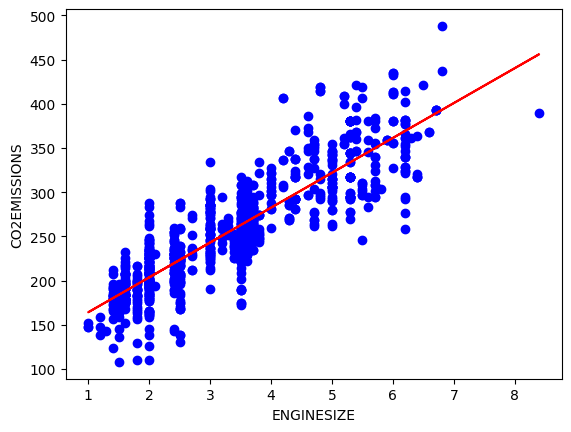

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
#            X, Y=       θ0         +          θ1x
#        -------  ----------------- - -------------------------
plt.plot(train_x, reg.intercept_[0] + reg.coef_[0][0] * train_x, 'r-')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [18]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print("test['ENGINESIZE']")
print(test['ENGINESIZE'].head())
print("test[['ENGINESIZE']]")
print(test[['ENGINESIZE']].head())
print("np.asanyarray(test[['ENGINESIZE']]")
print(test_x[:5])
print()

print("test['CO2EMISSIONS']")
print(test['CO2EMISSIONS'].head())
print("test[['CO2EMISSIONS']]")
print(test[['CO2EMISSIONS']].head())
print("np.asanyarray(test[['CO2EMISSIONS']]")
print(test_y[:5])
print()

# test_y_ is ŷ (y hat)
test_y_= reg.predict(test_x)
print("test_y_")
print(test_y_[:5])
print()

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(test_y - test_y_)))
print('Residual sum of squares / Mean Squared Error (MSE): %.2f' % np.mean((test_y - test_y_)**2))
print('R2-score: %.2f' % r2_score(test_y, test_y_))

test['ENGINESIZE']
11    3.5
54    4.0
59    3.0
64    2.0
68    4.0
Name: ENGINESIZE, dtype: float64
test[['ENGINESIZE']]
    ENGINESIZE
11         3.5
54         4.0
59         3.0
64         2.0
68         4.0
np.asanyarray(test[['ENGINESIZE']]
[[3.5]
 [4. ]
 [3. ]
 [2. ]
 [4. ]]

test['CO2EMISSIONS']
11    239
54    290
59    267
64    209
68    297
Name: CO2EMISSIONS, dtype: int64
test[['CO2EMISSIONS']]
    CO2EMISSIONS
11           239
54           290
59           267
64           209
68           297
np.asanyarray(test[['CO2EMISSIONS']]
[[239]
 [290]
 [267]
 [209]
 [297]]

test_y_
[[262.72141147]
 [282.43975468]
 [243.00306826]
 [203.56638184]
 [282.43975468]]

Mean Absolute Error: 22.74
Residual sum of squares / Mean Squared Error (MSE): 803.97
R2-score: 0.78


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>
